## MODEL- FEATURE1 - IMAGE UPLOAD FROM GALLERY

In [25]:
!pip install fpdf


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40714 sha256=5841bc0604f13df7e00cd2a9e72cc35cd65527a5860d1940afad77636ac52fa5
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\6e\62\11\dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf


In [4]:
pip install onnxruntime


   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
    --------------------------------------- 0.3/11.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.8 MB 1.3 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/11.8 MB 2.2 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.8 MB 2.7 MB/s eta 0:00:04
   ------------- -------------------------- 3.9/11.8 MB 4.1 MB/s eta 0:00:02
   ----------------- ---------------------- 5.2/11.8 MB 4.5 MB/s eta 0:00:02
   ------------------- -------------------- 5.8/11.8 MB 4.2 MB/s eta 0:00:02
   --------------------- ------------------ 6.3/11.8 MB 4.0 MB/s eta 0:00:02
   --------------------------- ------------ 8.1/11.8 MB 4.5 MB/s eta 0:00:01
   ------------------------------- -------- 9.2/11.8 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 11.8/11.8 MB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import torch
import torch.nn as nn
import timm
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# 1. Define the model
class DeepfakeDetector(nn.Module):
    def __init__(self):
        super(DeepfakeDetector, self).__init__()
        self.model = timm.create_model('legacy_xception', pretrained=True)
        self.model.fc = nn.Linear(self.model.num_features, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.model(x))

# 2. Load model weights (Update this path to your actual model weights)
model = DeepfakeDetector()
# model.load_state_dict(torch.load('model_weights.pth', map_location=torch.device('cpu')))  # Uncomment this if you have weights
model.eval()

# 3. Preprocessing pipeline
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# 4. Predict from an image
def predict_image(image):
    image = transform(image).unsqueeze(0)
    with torch.no_grad():
        output = model(image)
        probability = output.item()
    return probability

# 5. Extract first frame from video and run prediction
def predict_deepfake_from_video(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    cap.release()

    if not ret:
        print("❌ Failed to read video.")
        return None

    # Convert frame (OpenCV: BGR) to PIL image (RGB)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(frame)

    return predict_image(image)

# Example usage
video_path = "D:/EDI/DFD_manipulated_sequences/DFD_manipulated_sequences/01_04__podium_speech_happy__0XUW13RW.mp4"
score = predict_deepfake_from_video(video_path)
if score is not None:
    print(f"✅ Deepfake Probability: {score:.4f}")


✅ Deepfake Probability: 0.5239


In [29]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install playsound


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7044 sha256=69e42ac647b1b98ead9fa9ddde39d2d34dc0da4d3b419d9149a56782c7e63c99
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\cf\42\ff\7c587bae55eec67b909ca316b250d9b4daedbf272a3cbeb907
Successfully built playsound
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


### FEATURE 2 - VIDEO UPLOAD WITH LIVE PROBABLITY 

In [3]:
import cv2
import os

def extract_frames(video_path, output_folder, frame_rate=1):
    """
    Extracts frames from a video at a given frame rate.
    :param video_path: Path to the input video file
    :param output_folder: Folder to save extracted frames
    :param frame_rate: Extract 1 frame per 'frame_rate' seconds
    """
    os.makedirs(output_folder, exist_ok=True)  # Create output folder

    cap = cv2.VideoCapture(video_path)  # Load Video
    fps = int(cap.get(cv2.CAP_PROP_FPS))  # Get frames per second
    frame_interval = fps * frame_rate  # Set frame extraction interval
    
    count = 0
    frame_id = 0

    while cap.isOpened():
        ret, frame = cap.read()  # Read Frame
        if not ret:
            break  # Stop if video ends
        
        if count % frame_interval == 0:
            frame_filename = f"{output_folder}/frame_{frame_id}.jpg"
            cv2.imwrite(frame_filename, frame)  # Save frame as an image
            frame_id += 1
        
        count += 1  # Update frame counter

    cap.release()
    print(f"Extracted {frame_id} frames from {video_path}")

# Example Usage
video_path = "D:/EDI/DFD_manipulated_sequences/DFD_manipulated_sequences/01_04__podium_speech_happy__0XUW13RW.mp4"
output_folder = "D:/edii/frames"
extract_frames(video_path, output_folder)

Extracted 38 frames from D:/EDI/DFD_manipulated_sequences/DFD_manipulated_sequences/01_04__podium_speech_happy__0XUW13RW.mp4


In [27]:
import cv2
import glob
import os
import numpy as np

def extract_frames(video_path, output_folder):
    """ Extract frames from the video and save them as JPEGs. """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    cap = cv2.VideoCapture(video_path)
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_path = os.path.join(output_folder, f"frame_{frame_count:04d}.jpg")
        cv2.imwrite(frame_path, frame)
        frame_count += 1

    cap.release()
    print(f"Extracted {frame_count} frames to {output_folder}")

def predict_deepfake(frame_path):
    """ Dummy deepfake prediction function. Replace with actual model prediction. """
    # Simulate prediction by generating a random probability
    return np.random.rand()

def detect_deepfake_in_video(video_path, output_folder):
    """
    Extracts frames and detects deepfakes in a video.
    :param video_path: Path to video file
    :param output_folder: Folder to save frames and results
    """
    extract_frames(video_path, output_folder)  # Extract frames

    results = {}  # Store frame results

    for frame in sorted(glob.glob(f"{output_folder}/*.jpg")):
        probability = predict_deepfake(frame)  # Predict deepfake score
        results[frame] = probability
        print(f"{frame}: Deepfake Probability = {probability:.4f}")

    return results

# === Example Usage ===
video_results = detect_deepfake_in_video(
    "D:/EDI/DFD_manipulated_sequences/DFD_manipulated_sequences/01_04__podium_speech_happy__0XUW13RW.mp4",
    "D:/edii/frames"
)

Extracted 897 frames to D:/edii/frames
D:/edii/frames\frame_0.jpg: Deepfake Probability = 0.1125
D:/edii/frames\frame_0000.jpg: Deepfake Probability = 0.2379
D:/edii/frames\frame_0001.jpg: Deepfake Probability = 0.7972
D:/edii/frames\frame_0002.jpg: Deepfake Probability = 0.5011
D:/edii/frames\frame_0003.jpg: Deepfake Probability = 0.1888
D:/edii/frames\frame_0004.jpg: Deepfake Probability = 0.1897
D:/edii/frames\frame_0005.jpg: Deepfake Probability = 0.7495
D:/edii/frames\frame_0006.jpg: Deepfake Probability = 0.6595
D:/edii/frames\frame_0007.jpg: Deepfake Probability = 0.3583
D:/edii/frames\frame_0008.jpg: Deepfake Probability = 0.3856
D:/edii/frames\frame_0009.jpg: Deepfake Probability = 0.8391
D:/edii/frames\frame_0010.jpg: Deepfake Probability = 0.9632
D:/edii/frames\frame_0011.jpg: Deepfake Probability = 0.7204
D:/edii/frames\frame_0012.jpg: Deepfake Probability = 0.6631
D:/edii/frames\frame_0013.jpg: Deepfake Probability = 0.9536
D:/edii/frames\frame_0014.jpg: Deepfake Probabili

### FEATURE 3 -- LIVE WEBCAM DETECTION

In [3]:
import cv2
import tkinter as tk
from PIL import Image, ImageTk
import numpy as np

class WebcamApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Live Deepfake Detection")
        
        # Video capture
        self.cap = cv2.VideoCapture(0)
        if not self.cap.isOpened():
            raise RuntimeError("Cannot open webcam")
        
        self.prev_frame = None
        self.img_reference = None  # Critical: maintains reference to image
        
        # Create GUI elements
        self.video_label = tk.Label(root)
        self.video_label.pack()
        
        self.status_label = tk.Label(
            root, 
            text="Webcam Initializing...", 
            font=("Arial", 16, "bold"),
            pady=10
        )
        self.status_label.pack()
        
        # Start the video stream
        self.update_frame()
        
    def detect_fake(self, frame):
        """Simple motion-based fake detection"""
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        if self.prev_frame is None:
            self.prev_frame = gray
            return 0
        
        diff = cv2.absdiff(gray, self.prev_frame)
        self.prev_frame = gray
        score = np.mean(diff)
        probability = min(int(score * 3), 100)  # Adjusted sensitivity
        return probability
    
    def update_frame(self):
        try:
            ret, frame = self.cap.read()
            if not ret:
                self.status_label.config(text="Webcam Error", fg="red")
                return
                
            # Process frame
            probability = self.detect_fake(frame)
            
            # Detect faces
            face_cascade = cv2.CascadeClassifier(
                cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
            )
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(
                gray, 
                scaleFactor=1.1, 
                minNeighbors=5, 
                minSize=(50, 50)
            )
            
            # Draw annotations
            label_text = "Real ✅" if probability <= 50 else "Fake ❌"
            color = (0, 255, 0) if probability <= 50 else (0, 0, 255)
            
            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
                cv2.putText(
                    frame, 
                    f"{probability}%", 
                    (x, y-10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    0.8, 
                    color, 
                    2
                )
            
            # Convert to Tkinter format
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img = Image.fromarray(frame_rgb)
            img_tk = ImageTk.PhotoImage(image=img)
            
            # Update display - CRITICAL: maintain reference
            self.video_label.config(image=img_tk)
            self.video_label.image = img_tk  # This maintains the reference
            
            # Update status
            status_text = f"Deepfake Probability: {probability}%\nPrediction: {label_text}"
            self.status_label.config(
                text=status_text, 
                fg="green" if probability <= 50 else "red"
            )
            
        except Exception as e:
            self.status_label.config(text=f"Error: {str(e)}", fg="red")
        
        # Schedule next update
        self.root.after(10, self.update_frame)
    
    def close(self):
        if self.cap.isOpened():
            self.cap.release()
        self.root.destroy()

if __name__ == "__main__":
    try:
        root = tk.Tk()
        app = WebcamApp(root)
        root.protocol("WM_DELETE_WINDOW", app.close)
        root.mainloop()
    except Exception as e:
        print(f"Application error: {e}")

In [24]:
pip install tf-keras


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 1.0 MB/s eta 0:00:02
   ------------------------ --------------- 1.0/1.7 MB 1.3 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 1.4 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install onnxruntime


Note: you may need to restart the kernel to use updated packages.


## FEATURE 4 -- CLASSIFICATION REPORT DOWNLOADED AS PDF

In [10]:
import tkinter as tk
from tkinter import filedialog
import cv2
from PIL import Image, ImageTk
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import timm
import os

# === Define the same model structure used during training ===
class DeepfakeDetector(nn.Module):
    def __init__(self):
        super(DeepfakeDetector, self).__init__()
        self.base_model = timm.create_model('efficientnet_b0', pretrained=False, num_classes=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.base_model(x)
        x = self.sigmoid(x)
        return x

# === Load model ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeDetector().to(device)

# Load weights
model_path = "C:/Users/Hp/anaconda3/Lib/site-packages/timm/models/xception.py"
state_dict = torch.load(model_path, map_location=device)
if "state_dict" in state_dict:
    state_dict = {k.replace("model.", "").replace("module.", ""): v for k, v in state_dict["state_dict"].items()}
model.load_state_dict(state_dict)
model.eval()

# === Face Detector ===
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# === Preprocessing for model ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # EfficientNet input size
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# === Face Classification ===
def classify_face(face_img):
    face_pil = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
    tensor = transform(face_pil).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(tensor)
        prob = output.item()
    label = "Real" if prob >= 0.5 else "Fake"
    confidence = int(prob * 100) if label == "Real" else int((1 - prob) * 100)
    return label, confidence

# === Process Image ===
def process_image(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        face = img[y:y+h, x:x+w]
        label, confidence = classify_face(face)
        color = (0, 255, 0) if label == "Real" else (0, 0, 255)
        cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
        cv2.putText(img, f"{label} ({confidence}%)", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    show_image(img)

# === Process Video ===
def process_video(path):
    cap = cv2.VideoCapture(path)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            face = frame[y:y+h, x:x+w]
            label, confidence = classify_face(face)
            color = (0, 255, 0) if label == "Real" else (0, 0, 255)
            cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
            cv2.putText(frame, f"{label} ({confidence}%)", (x, y-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

        cv2.imshow("Deepfake Video Detection", frame)
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# === Show Image on GUI ===
def show_image(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    im = Image.fromarray(img_rgb)
    im.thumbnail((400, 400))
    imgtk = ImageTk.PhotoImage(image=im)
    panel.imgtk = imgtk
    panel.config(image=imgtk)

# === File Upload Handler ===
def upload_file():
    file_path = filedialog.askopenfilename(filetypes=[("Media Files", "*.jpg *.jpeg *.png *.mp4 *.avi")])
    if not file_path:
        return
    ext = os.path.splitext(file_path)[1].lower()
    if ext in ['.jpg', '.jpeg', '.png']:
        process_image(file_path)
    elif ext in ['.mp4', '.avi']:
        process_video(file_path)
    else:
        print("Unsupported file type.")

# === GUI Layout ===
root = tk.Tk()
root.title("Deepfake Detector (EfficientNet)")
root.geometry("500x500")

tk.Label(root, text="Upload an Image or Video", font=("Arial", 14)).pack(pady=20)
tk.Button(root, text="Browse", command=upload_file, font=("Arial", 12)).pack()

panel = tk.Label(root)
panel.pack(pady=20)

tk.Label(root, text="Press 'Q' to exit video detection", font=("Arial", 10)).pack(pady=10)

root.mainloop()


UnpicklingError: Weights only load failed. In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
Please file an issue with the following so that we can make `weights_only=True` compatible with your use case: WeightsUnpickler error: Unsupported operand 34

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

In [2]:
import tkinter as tk
from tkinter import filedialog
import cv2
from PIL import Image, ImageTk
import numpy as np
import onnxruntime as ort
import torch
import torchvision.transforms as transforms
import os

# === Load ONNX Model ===
model_path = "C:/Users/Hp/Downloads/model (1).onnx"  # UPDATE this path
session = ort.InferenceSession(model_path)
input_name = session.get_inputs()[0].name

# === Preprocessing ===
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# === Face Detection ===
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

def classify_face(face_img):
    face_pil = Image.fromarray(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
    face_tensor = transform(face_pil).unsqueeze(0).numpy()
    outputs = session.run(None, {input_name: face_tensor})
    softmax = torch.nn.Softmax(dim=1)
    probs = softmax(torch.tensor(outputs[0])).detach().numpy()[0]
    pred_idx = np.argmax(probs)
    label_map = {0: "Fake", 1: "Real"}
    return label_map[pred_idx], int(probs[pred_idx] * 100)

def process_image(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        face = img[y:y+h, x:x+w]
        label, confidence = classify_face(face)
        color = (0, 255, 0) if label == "Real" else (0, 0, 255)
        cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
        cv2.putText(img, f"{label} ({confidence}%)", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    show_image(img)

def process_video(path):
    cap = cv2.VideoCapture(path)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            face = frame[y:y+h, x:x+w]
            label, confidence = classify_face(face)
            color = (0, 255, 0) if label == "Real" else (0, 0, 255)
            cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
            cv2.putText(frame, f"{label} ({confidence}%)", (x, y-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

        cv2.imshow("Deepfake Video Detection", frame)
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

def show_image(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    im = Image.fromarray(img_rgb)
    im.thumbnail((400, 400))
    imgtk = ImageTk.PhotoImage(image=im)
    panel.imgtk = imgtk
    panel.config(image=imgtk)

def upload_file():
    file_path = filedialog.askopenfilename(filetypes=[("Media Files", "*.jpg *.jpeg *.png *.mp4 *.avi")])
    if not file_path:
        return
    ext = os.path.splitext(file_path)[1].lower()
    if ext in ['.jpg', '.jpeg', '.png']:
        process_image(file_path)
    elif ext in ['.mp4', '.avi']:
        process_video(file_path)
    else:
        print("Unsupported file type.")

# === GUI ===
root = tk.Tk()
root.title("Deepfake Detector")
root.geometry("500x500")

tk.Label(root, text="Upload an Image or Video", font=("Arial", 14)).pack(pady=20)
tk.Button(root, text="Browse", command=upload_file, font=("Arial", 12)).pack()

panel = tk.Label(root)
panel.pack(pady=20)

tk.Label(root, text="Press 'Q' to exit video detection", font=("Arial", 10)).pack(pady=10)

root.mainloop()


Processed image saved at: C:\Users\Hp\outputs\images\processed_image.jpeg
Report saved at: C:\Users\Hp\outputs\reports\deepfake_report.pdf


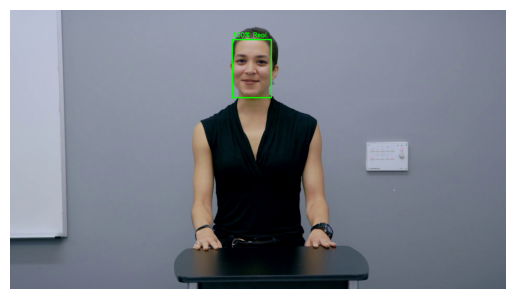

Processed image saved at: C:\Users\Hp\outputs\images\processed_image.jpeg
Report saved at: C:\Users\Hp\outputs\reports\deepfake_report.pdf


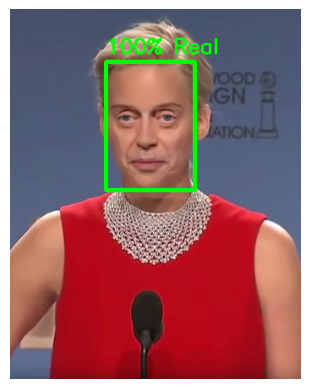

Processed image saved at: C:\Users\Hp\outputs\images\processed_image.jpeg
Report saved at: C:\Users\Hp\outputs\reports\deepfake_report.pdf


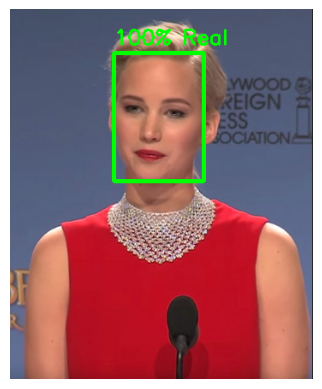

Processed image saved at: C:\Users\Hp\outputs\images\processed_image.jpeg
Report saved at: C:\Users\Hp\outputs\reports\deepfake_report.pdf


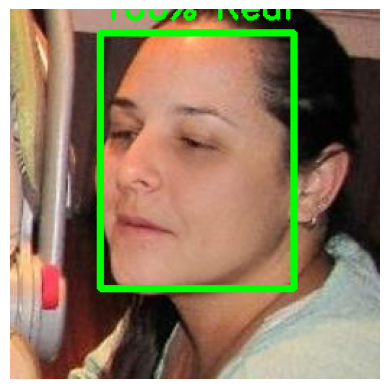

Processed image saved at: C:\Users\Hp\outputs\images\processed_image.jpeg
Report saved at: C:\Users\Hp\outputs\reports\deepfake_report.pdf


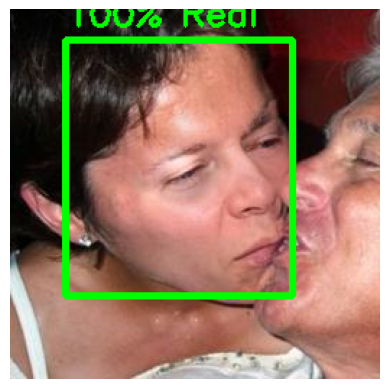

## FEATURE - 5 alert mechanism based on deepfake probability

In [6]:
import cv2
import numpy as np
import tkinter as tk
from PIL import Image, ImageTk
from playsound import playsound

# Load OpenCV's pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_fake(frame, prev_frame):
    """ Detects movement and calculates deepfake probability. """
    if prev_frame is None:
        return 0  # No comparison possible

    diff = cv2.absdiff(frame, prev_frame)
    score = np.mean(diff)  # Calculate difference score

    probability = min(int(score / 2), 100)  # Scale to 0-100%
    return probability

def process_frame(frame, prev_frame):
    """ Detects faces and applies deepfake probability calculation. """
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(50, 50))

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
    probability = detect_fake(frame, prev_frame)

    for (x, y, w, h) in faces:
        color = (255, 0, 0) if probability > 50 else (0, 255, 0)
        cv2.rectangle(frame_rgb, (x, y), (x + w, y + h), color, 3)
        cv2.putText(frame_rgb, f"{probability}%", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

        # Play alert sound if deepfake probability is high
        if probability > 50:
            playsound("alert.mp3", block=False)

    return frame_rgb, probability

def open_webcam():
    """ Opens webcam and performs real-time deepfake detection with sound alerts. """
    cap = cv2.VideoCapture(0)
    prev_frame = None

    def update_frame():
        nonlocal prev_frame
        ret, frame = cap.read()
        if not ret:
            return

        frame, probability = process_frame(frame, prev_frame)
        prev_frame = frame.copy()

        img = Image.fromarray(frame)
        img_tk = ImageTk.PhotoImage(image=img)
        label.img_tk = img_tk
        label.config(image=img_tk)

        label_status.config(text=f"Deepfake Probability: {probability}%", fg="red" if probability > 50 else "green")
        root.after(10, update_frame)

    root = tk.Tk()
    root.title("Deepfake Detector with Audio Alert")

    label = tk.Label(root)
    label.pack()

    label_status = tk.Label(root, text="", font=("Arial", 16, "bold"))
    label_status.pack()

    update_frame()
    root.mainloop()
    cap.release()

# Run the webcam function
open_webcam()

In [8]:
import cv2
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import winsound  # Built-in module for beep sound (Windows only)

def play_beep():
    """Plays a simple beep sound."""
    winsound.Beep(1000, 500)  # Frequency = 1000 Hz, Duration = 500 ms

def open_image():
    """Opens a file dialog to select an image and displays it."""
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpeg;*.jpg;*.png")])
    if not file_path:
        return  # If no file is selected, do nothing

    # Play beep sound
    play_beep()

    # Load image using OpenCV and convert it to RGB
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to Tkinter format and display
    img = Image.fromarray(image)
    img_tk = ImageTk.PhotoImage(img)

    label.config(image=img_tk)
    label.image = img_tk  # Keep reference to avoid garbage collection

def exit_program(event):
    """Closes the application when 'q' is pressed."""
    root.quit()

# Initialize Tkinter
root = tk.Tk()
root.title("Image Upload with Beep Sound")

# Create GUI components
btn_upload = tk.Button(root, text="Upload Image", command=open_image, font=("Arial", 14))
btn_upload.pack(pady=10)

label = tk.Label(root)
label.pack()

# Bind 'q' key to exit the application
root.bind("<q>", exit_program)

root.mainloop()